# **Danh sách nhóm**
- **NGÔ ĐỨC TUẤN (18520186)**
- **LÊ HOÀNG LONG (18521027)**
- **NGUYỄN ANH KHOA (18521027)**

# **ĐỒ ÁN CUỐI KỲ**
## **Tên bài báo: Keypoint Communities**

- Tác giả: Duncan Zauss, Sven Kreiss, Alexandre Alahi
- Tên hội nghị: ICCV 2021
- Keyword: Human Pose, Pose Estimation, Human Pose Estimation

**Môn : Các vấn đề chọn lọc trong thị giác máy tính - CS420.M11.KHCL**

# ***Yêu cầu:*** Thống kê theo sự gia tăng thứ hạng các keyword trên tại các bài báo trong hội nghị ICCV 2 năm liên tiếp (ICCV 2019 - ICCV 2021)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


# **A. THỐNG KÊ KEYWORD CỦA TIÊU ĐỀ (HỘI NGHỊ ICCV2021)**

## **1. Đọc file**

In [ ]:
file1 = open('/content/drive/My Drive/Các vấn đề chọn lọc CV/Đồ án/Data/ICCV2021.csv')
text1 = file1.read()

## **2. Thao tác trên file**
- Đầu tiên ta cần phải download thư viện `nltk`
    - Cú pháp `pip install nltk`
    - Thư viện nlkt (Natural Language ToolKit) là một trong những thư viện dẫn đầu sử dụng trong python làm việc với dữ liệu ngôn ngữ tự nhiên (NLP) . Thư viện cung cấp giao diện với hơn 50 tài nguyên từ vựng và ngữ liệu (corpora), cùng với các thư viện thích hợp để xử lý bài toán phân loại, token hóa (tokenization), stemming,…Để tìm hiểu thư viện nlkt, có thể tham khảo tại đây http://www.nltk.org/.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# viết thường toàn bộ câu (convert text to lower case)
lower_text1 = text1.lower()
print (lower_text1)

# tách văn bản thành từng câu
from nltk import sent_tokenize
sents1 = sent_tokenize(lower_text1)
print(sents1)

"adasgn: adapting joint number and model size for efficient skeleton-based action recognition"
"c2n: practical generative noise modeling for real-world denoising"
"continual learning on noisy data streams via self-purified replay"
"fovea: foveated image magnification for autonomous navigation"
"plenoctrees for real-time rendering of neural radiance fields"
"entropy maximization and meta classification for out-of-distribution detection in semantic segmentation"
"specificity-preserving rgb-d saliency detection"
"3dvg-transformer: relation modeling for visual grounding on point clouds"
"4d-net for learned multi-modal alignment"
"patch craft: video denoising by deep modeling and patch matching"
"image manipulation detection by multi-view multi-scale supervision"
"perturbed self-distillation: weakly supervised large-scale point cloud semantic segmentation"
"cherry-picking gradients: learning low-rank embeddings of visual data via differentiable cross-approximation"
"ask&confirm: active deta

In [ ]:
# tách từ, dấu câu khỏi văn bản
from nltk.tokenize import RegexpTokenizer

tokenizer1 = RegexpTokenizer(r"\w+")
word1 = tokenizer1.tokenize(lower_text1)
print(word1)

# trong bộ ngữ liệu corpus
# in ra các stopwords phổ biến trong tiếng Anh
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = list(stopwords.words('english'))

# loại stopwords khỏi text
removing_stopwords1 = [word for word in word1 if word not in stop_words]
print (removing_stopwords1)

['adasgn', 'adapting', 'joint', 'number', 'and', 'model', 'size', 'for', 'efficient', 'skeleton', 'based', 'action', 'recognition', 'c2n', 'practical', 'generative', 'noise', 'modeling', 'for', 'real', 'world', 'denoising', 'continual', 'learning', 'on', 'noisy', 'data', 'streams', 'via', 'self', 'purified', 'replay', 'fovea', 'foveated', 'image', 'magnification', 'for', 'autonomous', 'navigation', 'plenoctrees', 'for', 'real', 'time', 'rendering', 'of', 'neural', 'radiance', 'fields', 'entropy', 'maximization', 'and', 'meta', 'classification', 'for', 'out', 'of', 'distribution', 'detection', 'in', 'semantic', 'segmentation', 'specificity', 'preserving', 'rgb', 'd', 'saliency', 'detection', '3dvg', 'transformer', 'relation', 'modeling', 'for', 'visual', 'grounding', 'on', 'point', 'clouds', '4d', 'net', 'for', 'learned', 'multi', 'modal', 'alignment', 'patch', 'craft', 'video', 'denoising', 'by', 'deep', 'modeling', 'and', 'patch', 'matching', 'image', 'manipulation', 'detection', 'by'

***Nhận xét***: Khi thống kê các keyword về hội nghị liên quan tới CV, sẽ có một số từ mang tính "general", không cần thiết phải tìm kiếm tới nó, ví dụ: "learning", "image", "via", "using", ta có thêm vào stopwords và remove đi.

In [ ]:
# thêm 1 số stopwords
new_stopwords = ['learning', 'image', 'video', 'using', 'via', 'based', 'model-based', 'model', 'models', 'training', 'without', 'images', 'approach', 'data', 'information']
stop_words.extend(new_stopwords)

# loại stopwords khỏi text
removing_stopwords1 = [word for word in word1 if word not in stop_words]
print (removing_stopwords1)

['adasgn', 'adapting', 'joint', 'number', 'size', 'efficient', 'skeleton', 'action', 'recognition', 'c2n', 'practical', 'generative', 'noise', 'modeling', 'real', 'world', 'denoising', 'continual', 'noisy', 'streams', 'self', 'purified', 'replay', 'fovea', 'foveated', 'magnification', 'autonomous', 'navigation', 'plenoctrees', 'real', 'time', 'rendering', 'neural', 'radiance', 'fields', 'entropy', 'maximization', 'meta', 'classification', 'distribution', 'detection', 'semantic', 'segmentation', 'specificity', 'preserving', 'rgb', 'saliency', 'detection', '3dvg', 'transformer', 'relation', 'modeling', 'visual', 'grounding', 'point', 'clouds', '4d', 'net', 'learned', 'multi', 'modal', 'alignment', 'patch', 'craft', 'denoising', 'deep', 'modeling', 'patch', 'matching', 'manipulation', 'detection', 'multi', 'view', 'multi', 'scale', 'supervision', 'perturbed', 'self', 'distillation', 'weakly', 'supervised', 'large', 'scale', 'point', 'cloud', 'semantic', 'segmentation', 'cherry', 'picking'

## **3. Thống kê keyword xuất hiện theo thứ tự giảm dần tần suất xuất hiện của từ đó**

### **3.1 Thống kê keyword với 1 từ**

In [ ]:
# thống kê token được sử dụng trong văn bản
from nltk.probability import FreqDist
fd1 = FreqDist(removing_stopwords1)
print(fd1)

# lấy ra 1000 từ phổ biến nhất ( Most Common Words )
print (fd1.most_common(1000))

<FreqDist with 2746 samples and 11276 outcomes>
[('3d', 146), ('detection', 140), ('supervised', 135), ('object', 131), ('segmentation', 127), ('multi', 119), ('neural', 107), ('network', 100), ('visual', 94), ('self', 90), ('semantic', 90), ('domain', 88), ('deep', 82), ('estimation', 82), ('recognition', 78), ('point', 78), ('graph', 71), ('pose', 69), ('unsupervised', 69), ('aware', 69), ('networks', 68), ('human', 68), ('representation', 66), ('shot', 66), ('adversarial', 65), ('transformer', 58), ('attention', 56), ('view', 51), ('feature', 51), ('motion', 51), ('generation', 50), ('adaptation', 50), ('scene', 49), ('cross', 48), ('temporal', 46), ('contrastive', 46), ('reconstruction', 46), ('cloud', 44), ('transformers', 44), ('prediction', 44), ('adaptive', 44), ('end', 43), ('scale', 42), ('action', 41), ('single', 41), ('dynamic', 41), ('weakly', 39), ('shape', 39), ('efficient', 38), ('towards', 38), ('vision', 37), ('real', 36), ('person', 36), ('depth', 35), ('synthesis', 

### **3.2 Thống kê keyword với 2 từ**

In [ ]:
import nltk.collocations as collocations
from nltk import bigrams

word_pair2 = list(bigrams(removing_stopwords1))
bigrams_fd2 = FreqDist(word_pair2)

print(bigrams_fd2.most_common(1000))

[(('self', 'supervised'), 63), (('object', 'detection'), 62), (('semantic', 'segmentation'), 57), (('domain', 'adaptation'), 41), (('point', 'cloud'), 40), (('weakly', 'supervised'), 38), (('neural', 'networks'), 35), (('pose', 'estimation'), 34), (('semi', 'supervised'), 26), (('multi', 'view'), 24), (('3d', 'object'), 23), (('large', 'scale'), 22), (('super', 'resolution'), 22), (('3d', 'human'), 21), (('end', 'end'), 21), (('person', 'identification'), 20), (('point', 'clouds'), 17), (('human', 'pose'), 17), (('real', 'time'), 16), (('architecture', 'search'), 16), (('depth', 'estimation'), 16), (('fine', 'grained'), 16), (('action', 'recognition'), 15), (('neural', 'radiance'), 15), (('radiance', 'fields'), 15), (('cross', 'modal'), 15), (('zero', 'shot'), 15), (('instance', 'segmentation'), 14), (('scene', 'graph'), 13), (('knowledge', 'distillation'), 13), (('neural', 'architecture'), 13), (('supervised', 'semantic'), 13), (('real', 'world'), 12), (('question', 'answering'), 12),

### **3.3 Thống kê keyword với 3 từ**

In [ ]:
from nltk import trigrams

word_tripple2 = list(trigrams(removing_stopwords1))
trigrams_fd2 = FreqDist(word_tripple2)

print(trigrams_fd2.most_common(1000))

[(('3d', 'object', 'detection'), 20), (('supervised', 'semantic', 'segmentation'), 13), (('neural', 'radiance', 'fields'), 12), (('neural', 'architecture', 'search'), 12), (('human', 'pose', 'estimation'), 10), (('3d', 'human', 'pose'), 10), (('multi', 'view', 'stereo'), 10), (('scene', 'graph', 'generation'), 9), (('point', 'cloud', 'registration'), 9), (('unsupervised', 'domain', 'adaptation'), 9), (('monocular', 'depth', 'estimation'), 9), (('visual', 'question', 'answering'), 8), (('self', 'supervised', 'representation'), 7), (('graph', 'neural', 'networks'), 7), (('weakly', 'supervised', 'semantic'), 7), (('monocular', '3d', 'object'), 7), (('weakly', 'supervised', 'object'), 6), (('temporal', 'action', 'localization'), 6), (('domain', 'adaptation', 'semantic'), 6), (('shot', 'semantic', 'segmentation'), 6), (('unsupervised', 'point', 'cloud'), 5), (('salient', 'object', 'detection'), 5), (('multi', 'source', 'domain'), 5), (('source', 'domain', 'adaptation'), 5), (('adaptation', 

## **4. Vẽ biểu đồ các keyword theo thứ tự giảm dần số lần xuất hiện**

### **4.1 Vẽ biểu đồ thống kê cho 1 từ**

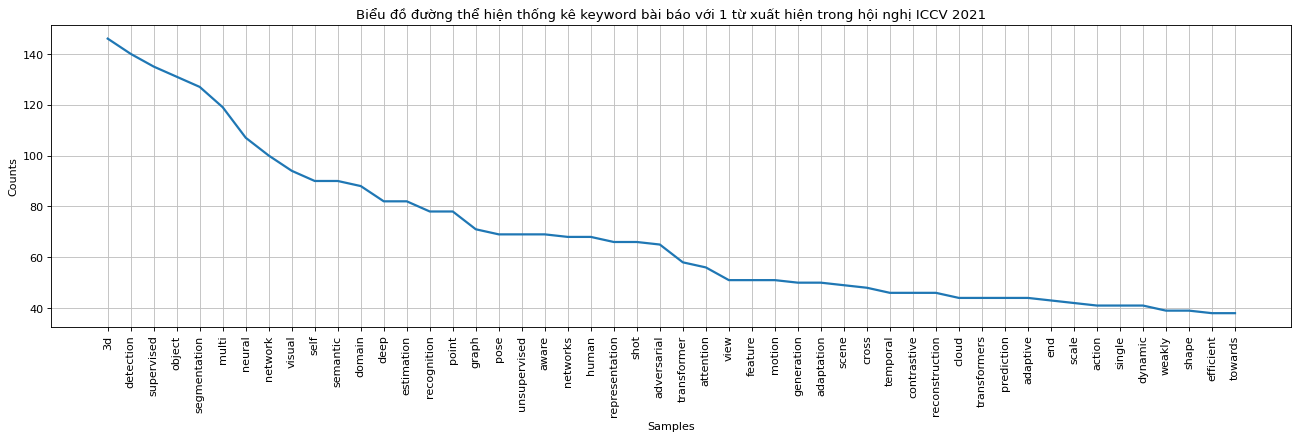

In [ ]:
# Vẽ biểu đồ đường cho 50 từ phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
fd1.plot(50,cumulative=False, title = "Biểu đồ đường thể hiện thống kê keyword bài báo với 1 từ xuất hiện trong hội nghị ICCV 2021")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=1_linegraph.png', bbox_inches = "tight")

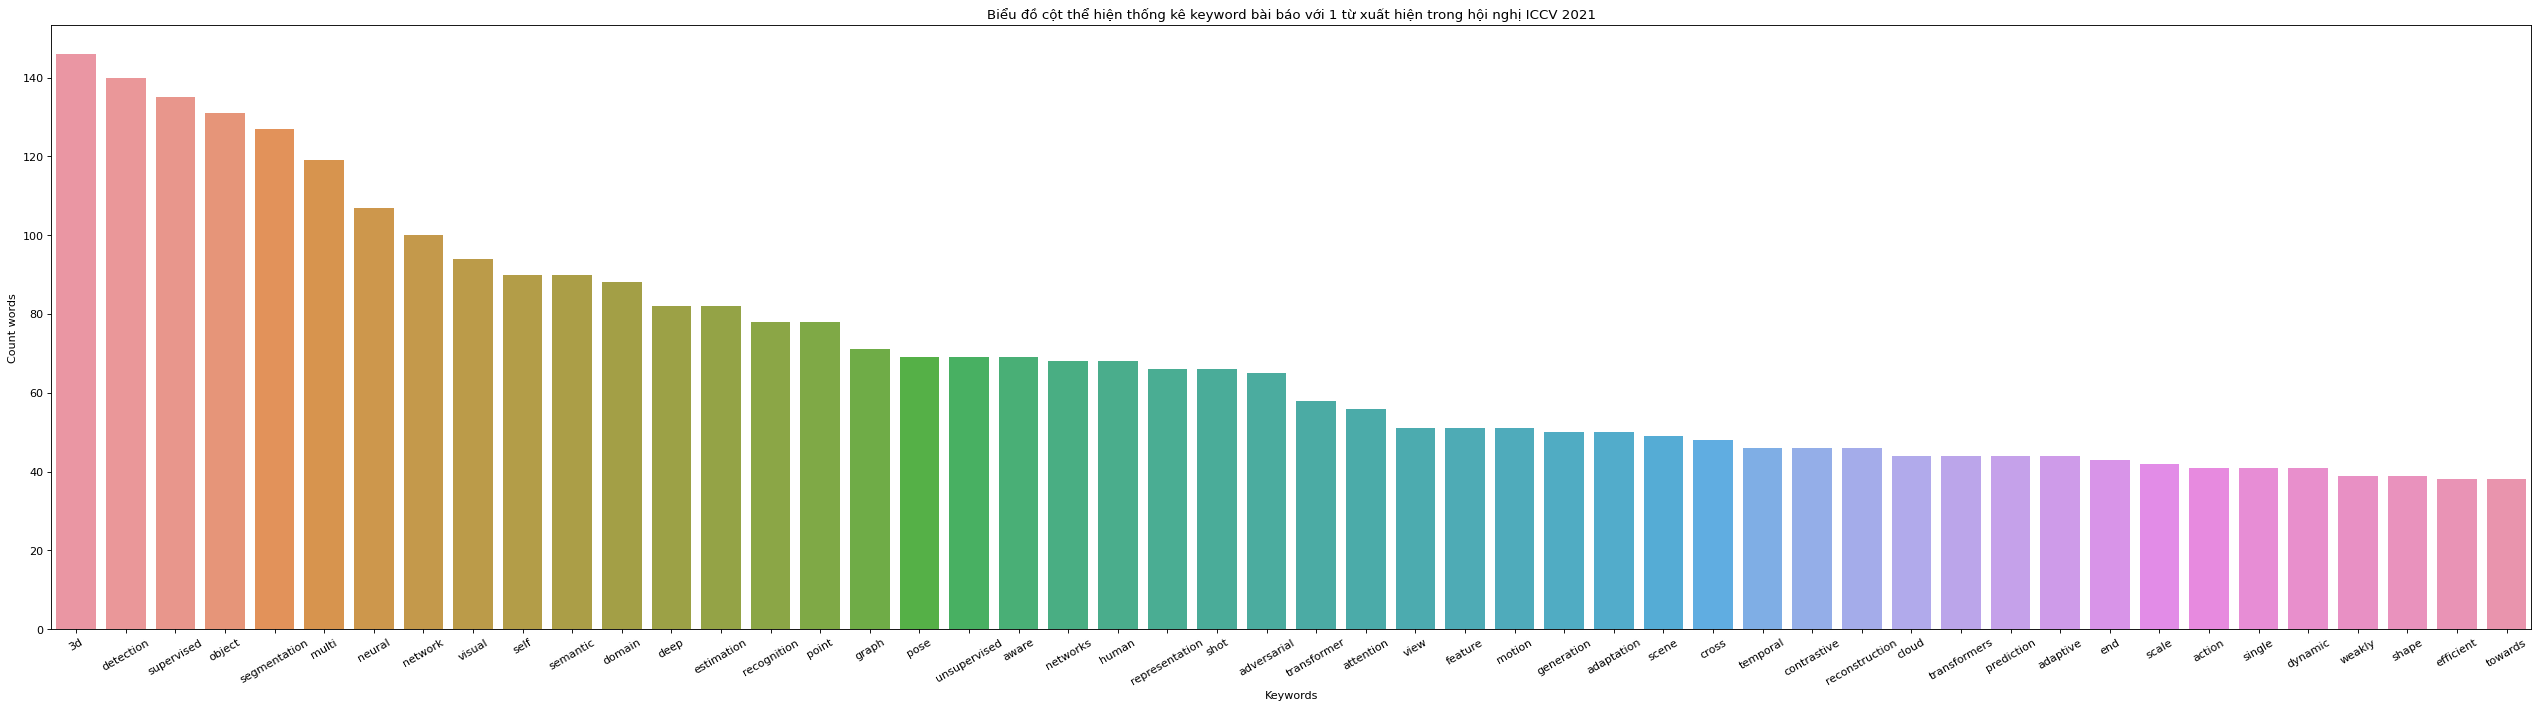

In [ ]:
# Vẽ biểu đồ cột cho 50 từ phổ biến nhất
import pandas as pd
import seaborn as sns

fd1 = FreqDist(removing_stopwords1).most_common(50)
fd1 = pd.Series(dict(fd1))

fig, ax = plt.subplots(figsize=(40,10), dpi = 80)
bar_plot = sns.barplot(x=fd1.index, y=fd1.values, ax=ax)
plt.xticks(rotation=30);
plt.xlabel("Keywords")
plt.ylabel("Count words")
plt.title("Biểu đồ cột thể hiện thống kê keyword bài báo với 1 từ xuất hiện trong hội nghị ICCV 2021")

fig.savefig('freqDistofPapers_ngram=1_barchart.png', bbox_inches = "tight")

### **4.2 Vẽ biểu đồ thống kê cho 2 từ**

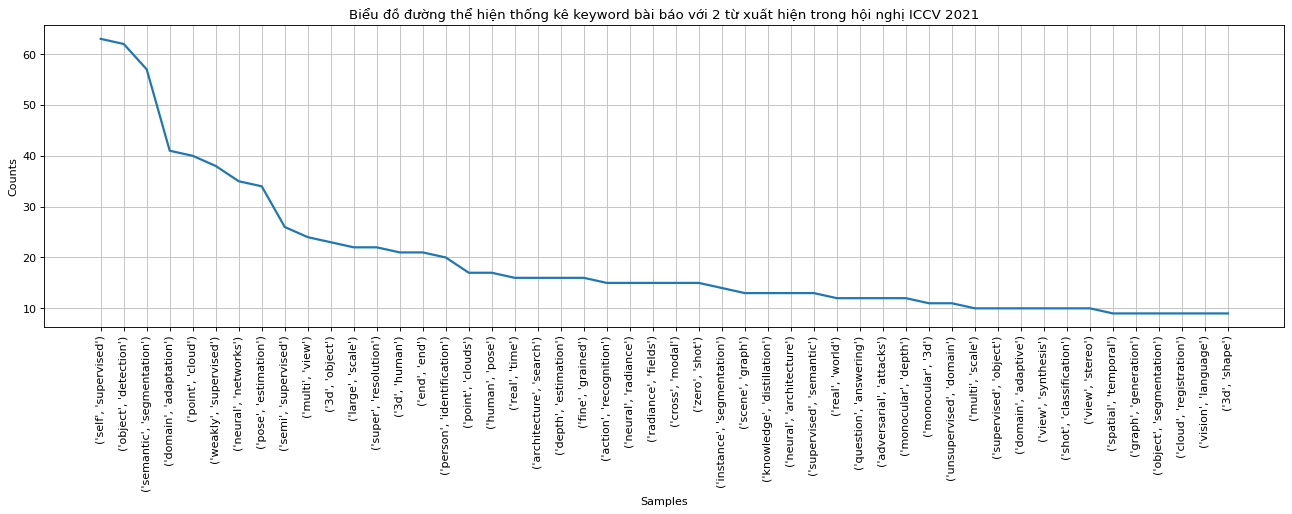

In [ ]:
# Vẽ biểu đồ đường cho 50 cặp từ phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
bigrams_fd2.plot(50,cumulative=False, title = "Biểu đồ đường thể hiện thống kê keyword bài báo với 2 từ xuất hiện trong hội nghị ICCV 2021")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=2_linegraph.png', bbox_inches = "tight")

### **4.3 Vẽ biểu đồ thống kê cho 3 từ**

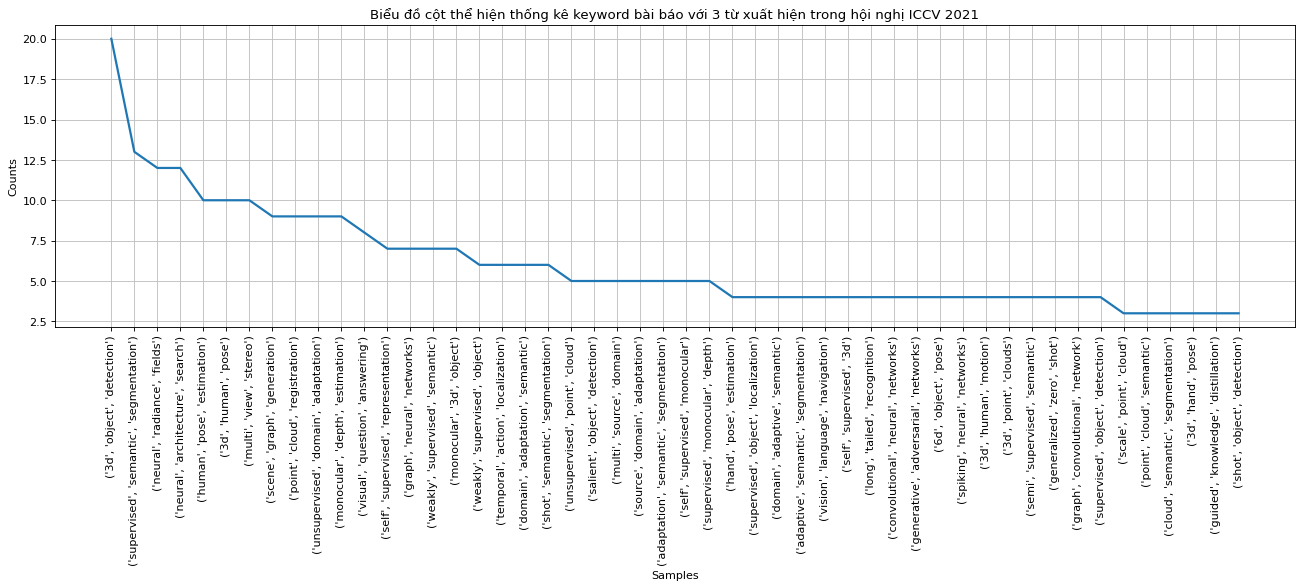

In [ ]:
# Vẽ biểu đồ đường cho 50 từ cặp 3 phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
trigrams_fd2.plot(50,cumulative=False, title = "Biểu đồ cột thể hiện thống kê keyword bài báo với 3 từ xuất hiện trong hội nghị ICCV 2021")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=3_linegraph.png', bbox_inches = "tight")

# **B. THỐNG KÊ KEYWORD CỦA TIÊU ĐỀ (HỘI NGHỊ ICCV2019)**

## **1. Đọc file**

In [ ]:
file3 = open('/content/drive/My Drive/Các vấn đề chọn lọc CV/Đồ án/Data/ICCV2019.csv')
text3 = file3.read()

## **2. Thao tác trên file**
- Đầu tiên ta cần phải download thư viện `nltk`
    - Cú pháp `pip install nltk`
    - Thư viện nlkt (Natural Language ToolKit) là một trong những thư viện dẫn đầu sử dụng trong python làm việc với dữ liệu ngôn ngữ tự nhiên (NLP) . Thư viện cung cấp giao diện với hơn 50 tài nguyên từ vựng và ngữ liệu (corpora), cùng với các thư viện thích hợp để xử lý bài toán phân loại, token hóa (tokenization), stemming,…Để tìm hiểu thư viện nlkt, có thể tham khảo tại đây http://www.nltk.org/.

In [ ]:
# viết thường toàn bộ câu (convert text to lower case)
lower_text3 = text3.lower()
print (lower_text3)

# tách văn bản thành từng câu
from nltk import sent_tokenize
sents3 = sent_tokenize(lower_text3)
print(sents3)

"faceforensics++: learning to detect manipulated facial images"
"deepvcp: an end-to-end deep neural network for point cloud registration"
"shape reconstruction using differentiable projections and deep priors"
"fine-grained segmentation networks: self-supervised segmentation for improved long-term visual localization"
"sanet: scene agnostic network for camera localization"
"total denoising: unsupervised learning of 3d point cloud cleaning"
"hierarchical self-attention network for action localization in videos"
"goal-driven sequential data abstraction"
"jointly aligning millions of images with deep penalised reconstruction congealing"
"drop to adapt: learning discriminative features for unsupervised domain adaptation"
"nlnl: negative learning for noisy labels"
"adversarial robustness vs. model compression, or both?"
"on the design of black-box adversarial examples by leveraging gradient-free optimization and operator splitting method"
"dewarpnet: single-image document unwarping with sta

In [ ]:
# tách từ, dấu câu khỏi văn bản
from nltk.tokenize import RegexpTokenizer

tokenizer3 = RegexpTokenizer(r"\w+")
word3 = tokenizer3.tokenize(lower_text3)
print(word3)

# trong bộ ngữ liệu corpus
# in ra các stopwords phổ biến trong tiếng Anh
from nltk.corpus import stopwords
print(stopwords.words('english'))
stop_words = list(stopwords.words('english'))

# loại stopwords khỏi text
removing_stopwords3 = [word for word in word3 if word not in stop_words]
print (removing_stopwords3)

['faceforensics', 'learning', 'to', 'detect', 'manipulated', 'facial', 'images', 'deepvcp', 'an', 'end', 'to', 'end', 'deep', 'neural', 'network', 'for', 'point', 'cloud', 'registration', 'shape', 'reconstruction', 'using', 'differentiable', 'projections', 'and', 'deep', 'priors', 'fine', 'grained', 'segmentation', 'networks', 'self', 'supervised', 'segmentation', 'for', 'improved', 'long', 'term', 'visual', 'localization', 'sanet', 'scene', 'agnostic', 'network', 'for', 'camera', 'localization', 'total', 'denoising', 'unsupervised', 'learning', 'of', '3d', 'point', 'cloud', 'cleaning', 'hierarchical', 'self', 'attention', 'network', 'for', 'action', 'localization', 'in', 'videos', 'goal', 'driven', 'sequential', 'data', 'abstraction', 'jointly', 'aligning', 'millions', 'of', 'images', 'with', 'deep', 'penalised', 'reconstruction', 'congealing', 'drop', 'to', 'adapt', 'learning', 'discriminative', 'features', 'for', 'unsupervised', 'domain', 'adaptation', 'nlnl', 'negative', 'learning'

***Nhận xét***: Khi thống kê các keyword về hội nghị liên quan tới CV, sẽ có một số từ mang tính "general", không cần thiết phải tìm kiếm tới nó, ví dụ: "learning", "image", "via", "using", ta có thêm vào stopwords và remove đi.

In [ ]:
# thêm 1 số stopwords
new_stopwords = ['learning', 'image', 'video', 'using', 'via', 'based', 'model-based', 'model', 'models', 'training', 'without', 'images', 'approach', 'data', 'information']
stop_words.extend(new_stopwords)

# loại stopwords khỏi text
removing_stopwords3 = [word for word in word3 if word not in stop_words]
print (removing_stopwords3)

['faceforensics', 'detect', 'manipulated', 'facial', 'deepvcp', 'end', 'end', 'deep', 'neural', 'network', 'point', 'cloud', 'registration', 'shape', 'reconstruction', 'differentiable', 'projections', 'deep', 'priors', 'fine', 'grained', 'segmentation', 'networks', 'self', 'supervised', 'segmentation', 'improved', 'long', 'term', 'visual', 'localization', 'sanet', 'scene', 'agnostic', 'network', 'camera', 'localization', 'total', 'denoising', 'unsupervised', '3d', 'point', 'cloud', 'cleaning', 'hierarchical', 'self', 'attention', 'network', 'action', 'localization', 'videos', 'goal', 'driven', 'sequential', 'abstraction', 'jointly', 'aligning', 'millions', 'deep', 'penalised', 'reconstruction', 'congealing', 'drop', 'adapt', 'discriminative', 'features', 'unsupervised', 'domain', 'adaptation', 'nlnl', 'negative', 'noisy', 'labels', 'adversarial', 'robustness', 'vs', 'compression', 'design', 'black', 'box', 'adversarial', 'examples', 'leveraging', 'gradient', 'free', 'optimization', 'op

## **3. Thống kê keyword xuất hiện theo thứ tự giảm dần tần suất xuất hiện của từ đó**

### **3.1 Thống kê keyword với 1 từ**

In [ ]:
# thống kê token được sử dụng trong văn bản
from nltk.probability import FreqDist
fd3 = FreqDist(removing_stopwords3)
print(fd3)

# lấy ra 1000 từ phổ biến nhất ( Most Common Words )
print (fd3.most_common(1000))

<FreqDist with 2035 samples and 7161 outcomes>
[('object', 108), ('network', 104), ('detection', 104), ('deep', 100), ('3d', 96), ('networks', 89), ('multi', 78), ('segmentation', 76), ('neural', 60), ('adversarial', 60), ('supervised', 57), ('estimation', 55), ('attention', 54), ('semantic', 54), ('visual', 51), ('pose', 51), ('recognition', 50), ('human', 49), ('aware', 46), ('feature', 46), ('domain', 45), ('unsupervised', 44), ('single', 44), ('shot', 44), ('point', 43), ('person', 40), ('view', 37), ('identification', 36), ('depth', 33), ('action', 32), ('scene', 31), ('graph', 31), ('end', 30), ('convolutional', 30), ('shape', 29), ('self', 29), ('generative', 29), ('temporal', 29), ('localization', 28), ('motion', 28), ('scale', 27), ('adaptation', 26), ('robust', 26), ('guided', 26), ('joint', 26), ('weakly', 25), ('matching', 25), ('representation', 25), ('prediction', 25), ('reconstruction', 24), ('cross', 24), ('monocular', 24), ('face', 23), ('dataset', 23), ('adaptive', 23

### **3.2 Thống kê keyword với 2 từ**

In [ ]:
word_pair4 = list(bigrams(removing_stopwords3))
bigrams_fd4 = FreqDist(word_pair4)

print(bigrams_fd4.most_common(1000))

[(('object', 'detection'), 57), (('person', 'identification'), 31), (('semantic', 'segmentation'), 26), (('weakly', 'supervised'), 24), (('neural', 'networks'), 23), (('pose', 'estimation'), 23), (('domain', 'adaptation'), 19), (('multi', 'view'), 18), (('point', 'cloud'), 17), (('generative', 'adversarial'), 16), (('end', 'end'), 15), (('3d', 'human'), 15), (('semi', 'supervised'), 15), (('zero', 'shot'), 15), (('neural', 'network'), 14), (('fine', 'grained'), 14), (('self', 'supervised'), 13), (('super', 'resolution'), 13), (('human', 'pose'), 13), (('large', 'scale'), 13), (('attention', 'network'), 12), (('object', 'segmentation'), 11), (('convolutional', 'neural'), 11), (('action', 'recognition'), 10), (('real', 'time'), 10), (('adversarial', 'networks'), 9), (('crowd', 'counting'), 9), (('salient', 'object'), 9), (('3d', 'object'), 9), (('3d', 'point'), 8), (('multi', 'task'), 8), (('point', 'clouds'), 8), (('instance', 'segmentation'), 8), (('convolutional', 'networks'), 8), (('

### **3.3 Thống kê keyword với 3 từ**

In [ ]:
word_tripple4 = list(trigrams(removing_stopwords3))
trigrams_fd4 = FreqDist(word_tripple4)

print(trigrams_fd4.most_common(1000))

[(('3d', 'human', 'pose'), 9), (('salient', 'object', 'detection'), 9), (('convolutional', 'neural', 'networks'), 9), (('generative', 'adversarial', 'networks'), 8), (('human', 'pose', 'estimation'), 7), (('3d', 'point', 'cloud'), 6), (('human', 'object', 'interaction'), 6), (('generative', 'adversarial', 'network'), 6), (('weakly', 'supervised', 'object'), 6), (('supervised', 'object', 'detection'), 6), (('multi', 'view', 'stereo'), 5), (('3d', 'object', 'detection'), 5), (('unsupervised', 'domain', 'adaptation'), 4), (('visual', 'question', 'answering'), 4), (('object', 'interaction', 'detection'), 4), (('neural', 'architecture', 'search'), 4), (('shot', 'object', 'detection'), 4), (('single', 'super', 'resolution'), 4), (('visual', 'object', 'tracking'), 4), (('supervised', 'semantic', 'segmentation'), 4), (('deep', 'neural', 'network'), 3), (('facial', 'landmark', 'detection'), 3), (('attention', 'networks', 'person'), 3), (('large', 'scale', 'dataset'), 3), (('object', 'detection'

## **4. Vẽ biểu đồ các keyword theo thứ tự giảm dần số lần xuất hiện**

### **4.1 Vẽ biểu đồ thống kê cho 1 từ**

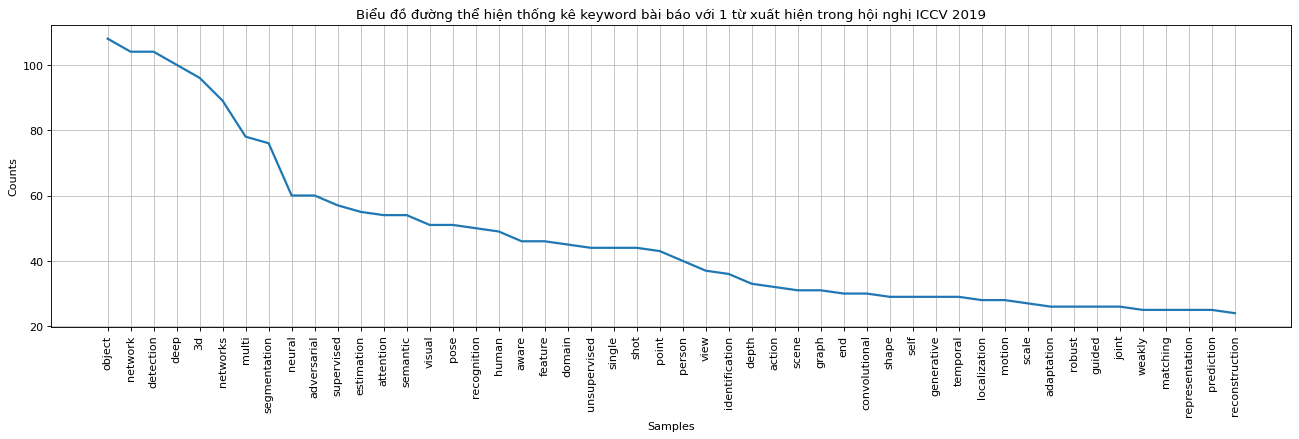

In [ ]:
# Vẽ biểu đồ đường cho 50 từ phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
fd3.plot(50,cumulative=False, title = "Biểu đồ đường thể hiện thống kê keyword bài báo với 1 từ xuất hiện trong hội nghị ICCV 2019")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=1_linegraph_2019.png', bbox_inches = "tight")

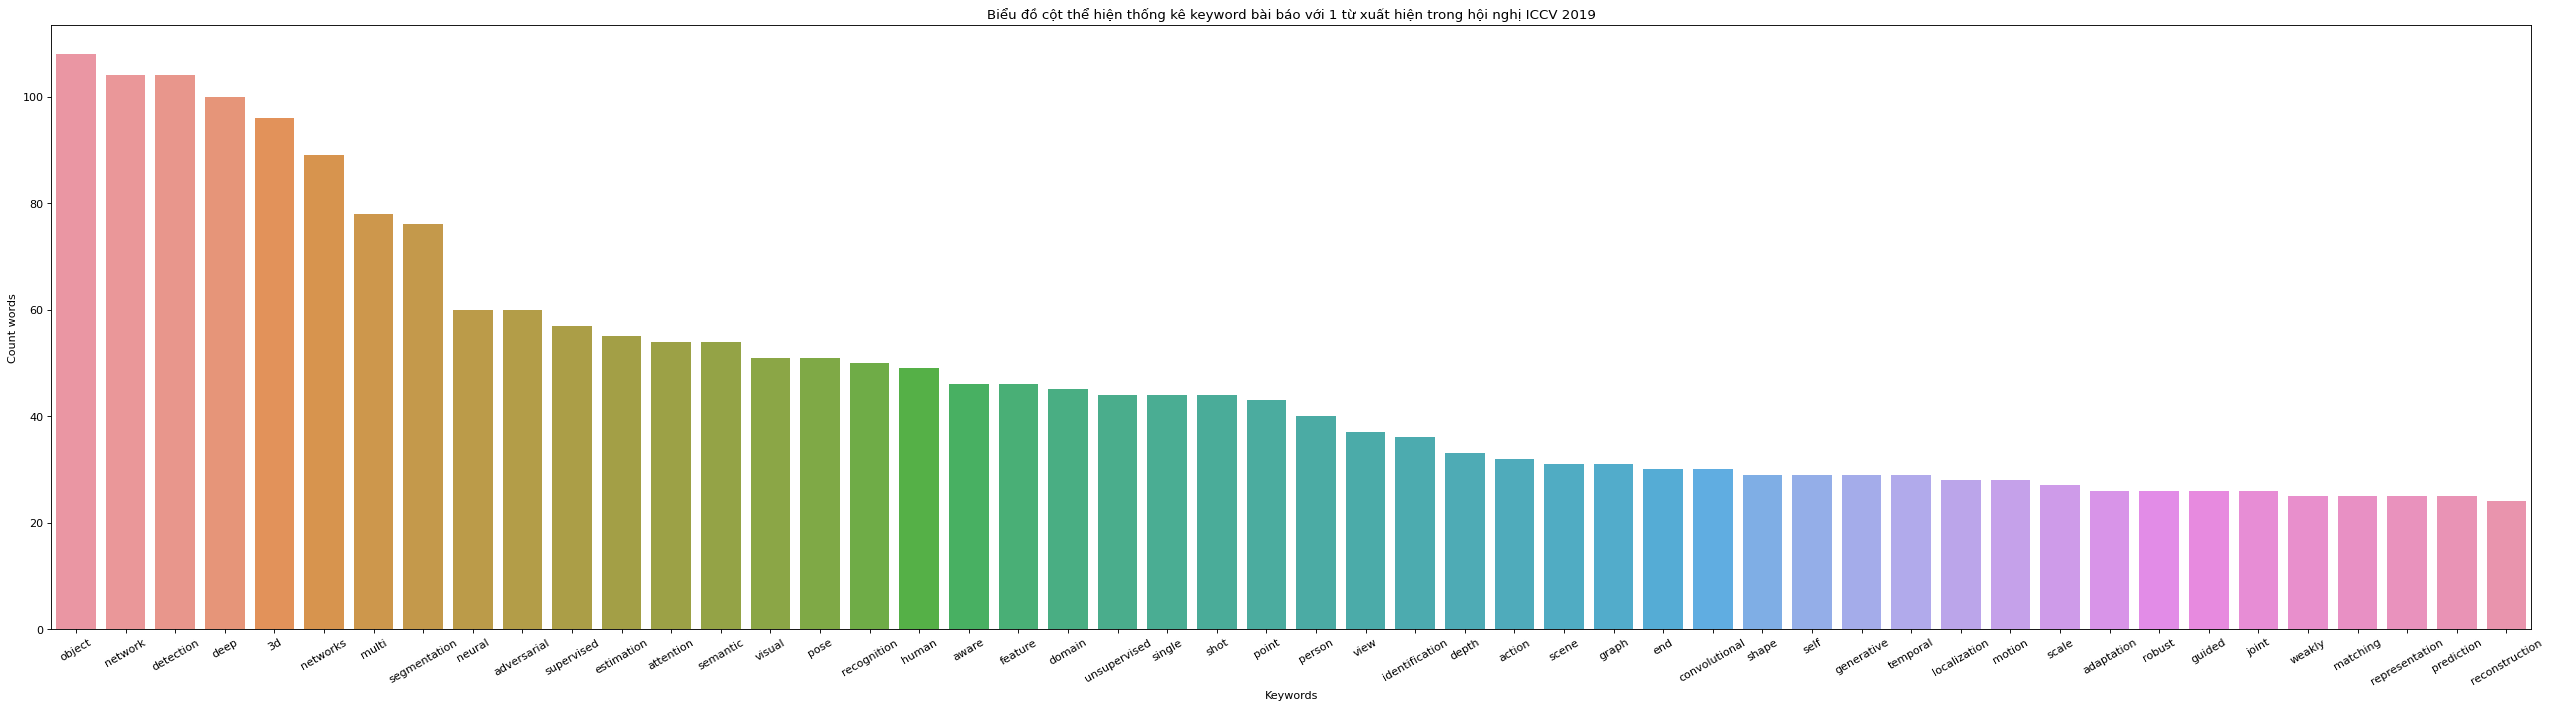

In [ ]:
# Vẽ biểu đồ cột cho 50 từ phổ biến nhất
fd3 = FreqDist(removing_stopwords3).most_common(50)
fd3 = pd.Series(dict(fd3))

fig, ax = plt.subplots(figsize=(40,10), dpi = 80)
bar_plot = sns.barplot(x=fd3.index, y=fd3.values, ax=ax)
plt.xticks(rotation=30);
plt.xlabel("Keywords")
plt.ylabel("Count words")
plt.title("Biểu đồ cột thể hiện thống kê keyword bài báo với 1 từ xuất hiện trong hội nghị ICCV 2019")

fig.savefig('freqDistofPapers_ngram=1_barchart_2019.png', bbox_inches = "tight")

### **4.2 Vẽ biểu đồ thống kê cho 2 từ**

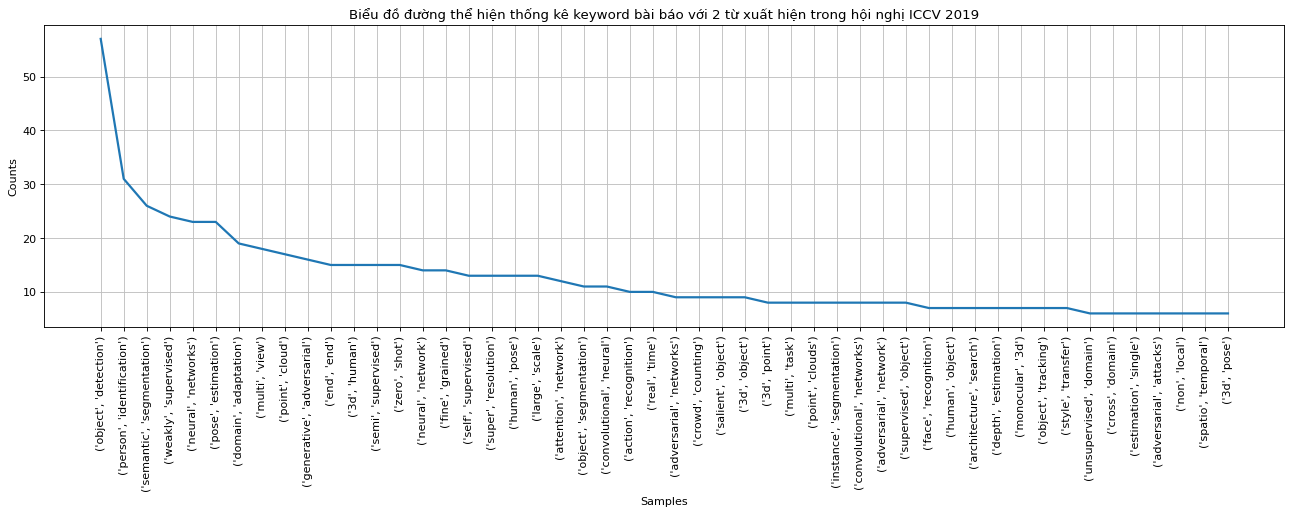

In [ ]:
# Vẽ biểu đồ đường cho 50 cặp từ phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
bigrams_fd4.plot(50,cumulative=False, title = "Biểu đồ đường thể hiện thống kê keyword bài báo với 2 từ xuất hiện trong hội nghị ICCV 2019")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=2_linegraph_2019.png', bbox_inches = "tight")

### **4.3 Vẽ biểu đồ thống kê cho 3 từ**

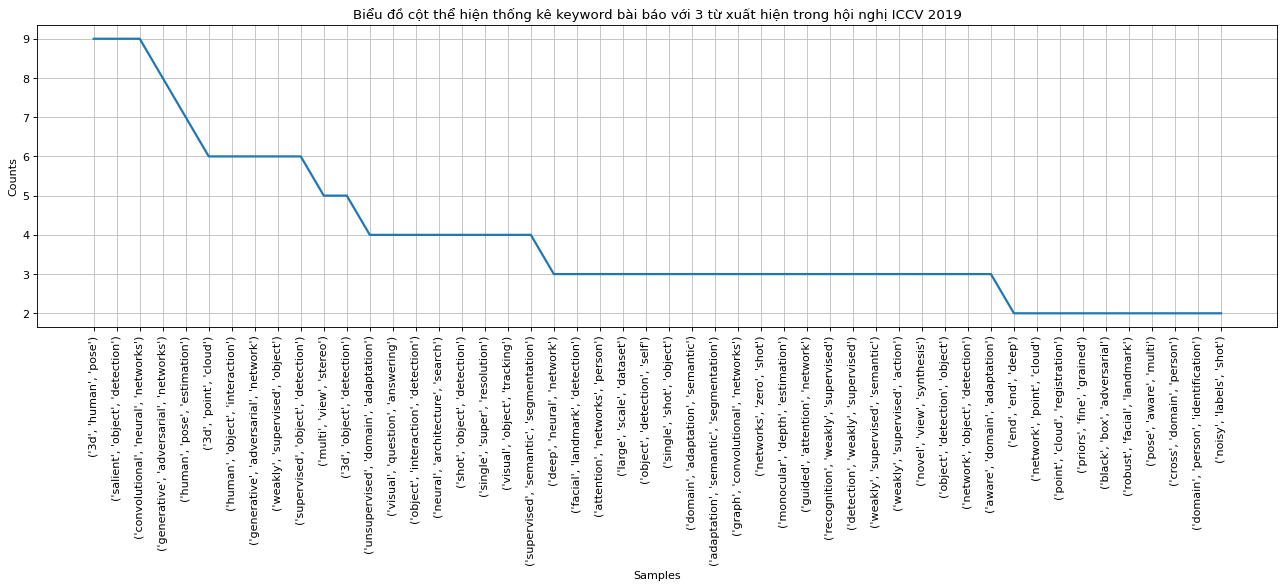

In [ ]:
# Vẽ biểu đồ đường cho 50 từ cặp 3 phổ biến nhất
fig = plt.figure(figsize = (20,5), dpi = 80)
trigrams_fd4.plot(50,cumulative=False, title = "Biểu đồ cột thể hiện thống kê keyword bài báo với 3 từ xuất hiện trong hội nghị ICCV 2019")
plt.show()

# save plot
fig.savefig('freqDistofPapers_ngram=3_linegraph_2019.png', bbox_inches = "tight")

# **C. SO SÁNH SỰ GIA TĂNG THỨ HẠNG KEYWORD CỦA TIÊU ĐỀ TRONG 2 NĂM HỘI NGHỊ ICCV2019 VÀ ICCV2021**

***PS:*** Đây chính là lựa chọn chủ đề theo xu hướng (trending).

## **1. So sánh sự gia tăng thứ hạng keyword với 1 từ**

In [ ]:
topword2021_1 = fd1.sort_values(ascending=False).head(30)
topword2019_1 = fd3.sort_values(ascending=False).head(30)

In [ ]:
topword2021_1

3d                146
detection         140
supervised        135
object            131
segmentation      127
multi             119
neural            107
network           100
visual             94
semantic           90
self               90
domain             88
deep               82
estimation         82
recognition        78
point              78
graph              71
pose               69
unsupervised       69
aware              69
networks           68
human              68
shot               66
representation     66
adversarial        65
transformer        58
attention          56
view               51
feature            51
motion             51
dtype: int64

In [ ]:
topword2019_1

object            108
network           104
detection         104
deep              100
3d                 96
networks           89
multi              78
segmentation       76
neural             60
adversarial        60
supervised         57
estimation         55
attention          54
semantic           54
visual             51
pose               51
recognition        50
human              49
aware              46
feature            46
domain             45
shot               44
unsupervised       44
single             44
point              43
person             40
view               37
identification     36
depth              33
action             32
dtype: int64

In [ ]:
topchange2021_1 = topword2021_1 - topword2019_1
topchange2021_1 = topchange2021_1.fillna(0)
topchange2021_1 = topchange2021_1.sort_values(ascending=False).head(30)
topword2021_1 = topword2021_1.sort_values(ascending=False).head(30)
topword2021_1.astype(float)
topword2019_1 = topword2019_1.sort_values(ascending=False).head(30)
topword2019_1.astype(float)

topchange2021_1 = pd.DataFrame({'keyword':topchange2021_1.index, 'change':topchange2021_1.values})
topchange2021_1

# xóa 5 rows cuối cùng (do không có sự thay đổi)
topchange2021_1.drop(topchange2021_1.tail(5).index,inplace=True) # drop last n rows
topchange2021_1

,keyword,change
0,supervised,78.0
1,segmentation,51.0
2,3d,50.0
3,neural,47.0
4,domain,43.0
5,visual,43.0
6,multi,41.0
7,semantic,36.0
8,detection,36.0
9,point,35.0


### **Vẽ biểu đồ**

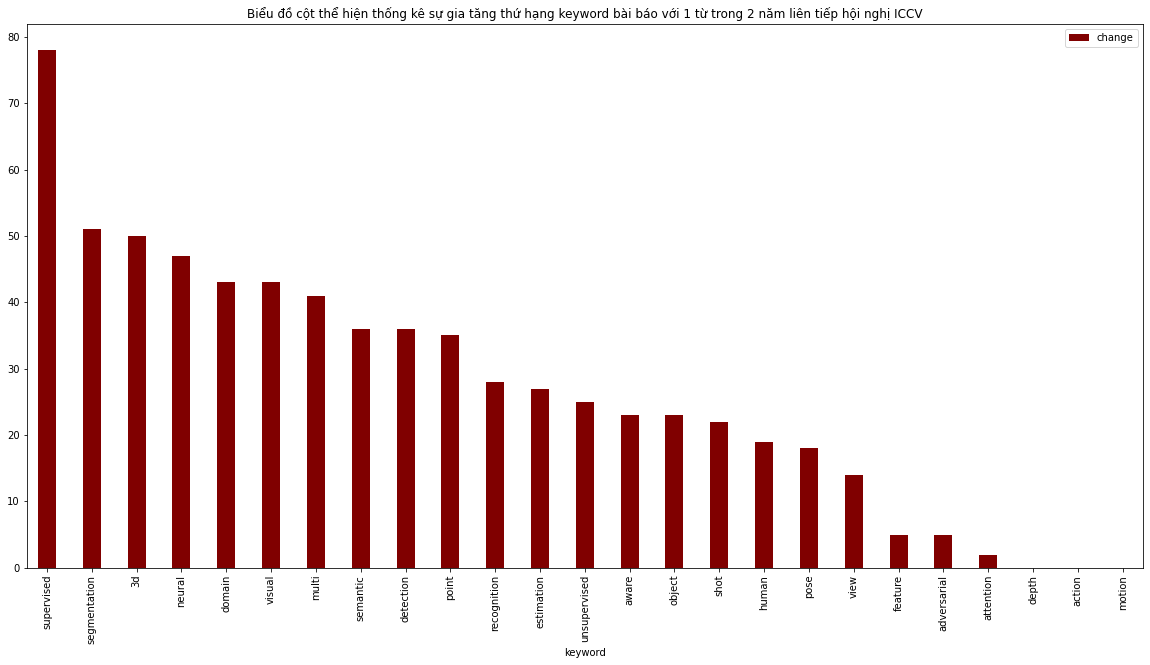

In [ ]:
fig = topchange2021_1.plot.bar(figsize=(20,10),x='keyword', y='change', color='maroon', width = 0.4, title='Biểu đồ cột thể hiện thống kê sự gia tăng thứ hạng keyword bài báo với 1 từ trong 2 năm liên tiếp hội nghị ICCV')

# save plot
fig.figure.savefig('changekeyword_Papers_ngram=1.png', bbox_inches = "tight")

## **2. So sánh sự gia tăng thứ hạng keyword với 2 từ**

In [ ]:
bigrams_fd2 = pd.Series(dict(bigrams_fd2))
bigrams_fd4 = pd.Series(dict(bigrams_fd4))

In [ ]:
topword2021_2 = bigrams_fd2.sort_values(ascending=False).head(30)
topword2019_2 = bigrams_fd4.sort_values(ascending=False).head(30)

In [ ]:
topword2021_2

self          supervised        63
object        detection         62
semantic      segmentation      57
domain        adaptation        41
point         cloud             40
weakly        supervised        38
neural        networks          35
pose          estimation        34
semi          supervised        26
multi         view              24
3d            object            23
large         scale             22
super         resolution        22
3d            human             21
end           end               21
person        identification    20
point         clouds            17
human         pose              17
architecture  search            16
fine          grained           16
real          time              16
depth         estimation        16
action        recognition       15
radiance      fields            15
neural        radiance          15
zero          shot              15
cross         modal             15
instance      segmentation      14
neural        archit

In [ ]:
topword2019_2

object         detection         57
person         identification    31
semantic       segmentation      26
weakly         supervised        24
pose           estimation        23
neural         networks          23
domain         adaptation        19
multi          view              18
point          cloud             17
generative     adversarial       16
zero           shot              15
3d             human             15
end            end               15
semi           supervised        15
neural         network           14
fine           grained           14
super          resolution        13
human          pose              13
self           supervised        13
large          scale             13
attention      network           12
object         segmentation      11
convolutional  neural            11
action         recognition       10
real           time              10
salient        object             9
crowd          counting           9
3d             object       

In [ ]:
topchange2021_2 = topword2021_2 - topword2019_2
topchange2021_2 = topchange2021_2.fillna(0)
topchange2021_2 = topchange2021_2.sort_values(ascending=False).head(30)
topword2021_2 = topword2021_2.sort_values(ascending=False).head(30)
topword2021_2.astype(float)
topword2019_2 = topword2019_2.sort_values(ascending=False).head(30)
topword2019_2.astype(float)

topchange2021_2 = pd.DataFrame({'a':topchange2021_2,'change':topchange2021_2.values})
del topchange2021_2["a"]
topchange2021_2

# xóa 14 rows cuối cùng (do không có sự thay đổi)
topchange2021_2.drop(topchange2021_2.tail(11).index,inplace=True) # drop last n rows
topchange2021_2

,,change
self,supervised,50.0
semantic,segmentation,31.0
point,cloud,23.0
domain,adaptation,22.0
3d,object,14.0
weakly,supervised,14.0
neural,networks,12.0
semi,supervised,11.0
pose,estimation,11.0
super,resolution,9.0


### **Vẽ biểu đồ**

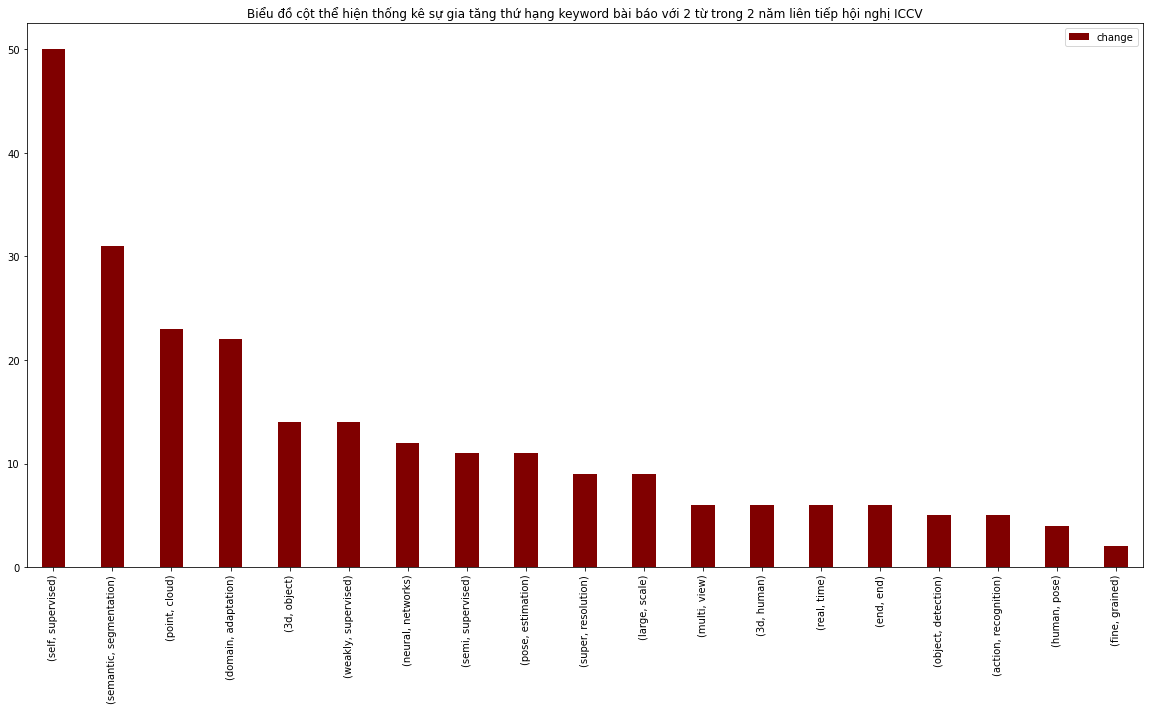

In [ ]:
fig = topchange2021_2.plot.bar(figsize=(20,10),y='change', color='maroon', width = 0.4, title='Biểu đồ cột thể hiện thống kê sự gia tăng thứ hạng keyword bài báo với 2 từ trong 2 năm liên tiếp hội nghị ICCV')

# save plot
fig.figure.savefig('changekeyword_Papers_ngram=2.png', bbox_inches = "tight")

## **3. So sánh sự gia tăng thứ hạng keyword với 3 từ**

In [ ]:
trigrams_fd2 = pd.Series(dict(trigrams_fd2))
trigrams_fd4 = pd.Series(dict(trigrams_fd4))

In [ ]:
topword2021_3 = trigrams_fd2.sort_values(ascending=False).head(30)
topword2019_3 = trigrams_fd4.sort_values(ascending=False).head(30)

In [ ]:
topword2021_3

3d            object        detection         20
supervised    semantic      segmentation      13
neural        architecture  search            12
              radiance      fields            12
human         pose          estimation        10
3d            human         pose              10
multi         view          stereo            10
unsupervised  domain        adaptation         9
monocular     depth         estimation         9
point         cloud         registration       9
scene         graph         generation         9
visual        question      answering          8
monocular     3d            object             7
weakly        supervised    semantic           7
self          supervised    representation     7
graph         neural        networks           7
weakly        supervised    object             6
shot          semantic      segmentation       6
temporal      action        localization       6
domain        adaptation    semantic           6
adaptation    semant

In [ ]:
topword2019_3

3d             human         pose            9
convolutional  neural        networks        9
salient        object        detection       9
generative     adversarial   networks        8
human          pose          estimation      7
               object        interaction     6
weakly         supervised    object          6
supervised     object        detection       6
3d             point         cloud           6
generative     adversarial   network         6
3d             object        detection       5
multi          view          stereo          5
supervised     semantic      segmentation    4
single         super         resolution      4
neural         architecture  search          4
object         interaction   detection       4
shot           object        detection       4
visual         question      answering       4
               object        tracking        4
unsupervised   domain        adaptation      4
weakly         supervised    semantic        3
aware        

In [ ]:
topchange2021_3 = topword2021_3 - topword2019_3
topchange2021_3 = topchange2021_3.fillna(0)
topchange2021_3 = topchange2021_3.sort_values(ascending=False).head(30)
topword2021_3 = topword2021_3.sort_values(ascending=False).head(30)
topword2021_3.astype(float)
topword2019_3 = topword2019_3.sort_values(ascending=False).head(30)
topword2019_3.astype(float)

topchange2021_3 = pd.DataFrame({'a':topchange2021_3,'change':topchange2021_3.values})
del topchange2021_3["a"]
topchange2021_3

# xóa 23 rows cuối cùng (do không có sự thay đổi)
topchange2021_3.drop(topchange2021_3.tail(20).index,inplace=True) # drop last n rows
topchange2021_3

,,,change
3d,object,detection,15.0
supervised,semantic,segmentation,9.0
neural,architecture,search,8.0
unsupervised,domain,adaptation,5.0
multi,view,stereo,5.0
weakly,supervised,semantic,4.0
visual,question,answering,4.0
human,pose,estimation,3.0
domain,adaptation,semantic,3.0
3d,human,pose,1.0


### **Vẽ biểu đồ**

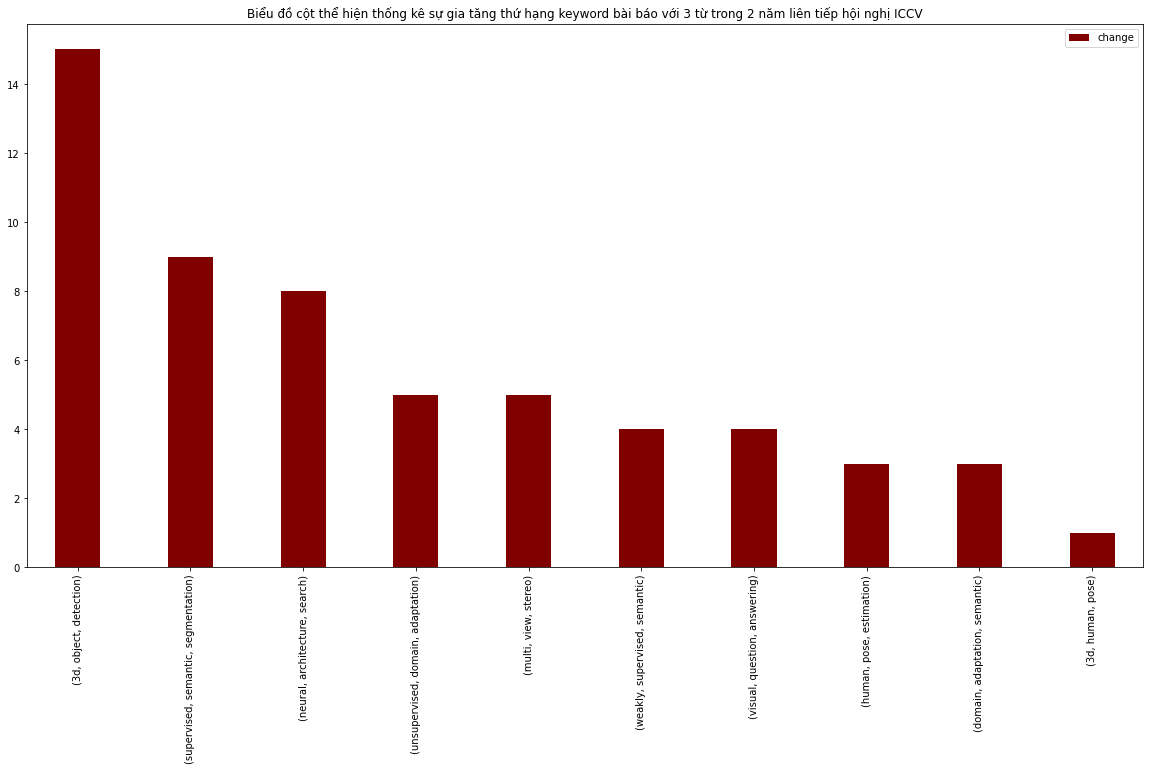

In [ ]:
fig = topchange2021_3.plot.bar(figsize=(20,10),y='change', color='maroon', width = 0.4, title='Biểu đồ cột thể hiện thống kê sự gia tăng thứ hạng keyword bài báo với 3 từ trong 2 năm liên tiếp hội nghị ICCV')

# save plot
fig.figure.savefig('changekeyword_Papers_ngram=3.png', bbox_inches = "tight")